In [ ]:
from qiskit.circuit.library import TwoLocal #initial/trial wave-function

In [ ]:
#Creating ansatz using a initial wave function (TwoLocal) and parametrizing it.
#inputs required for TwoLocal: number of qubits, ry and rc (why ey and rc??)

num_of_qubits = 2
ansatz = TwoLocal(num_of_qubits,"ry", "cz")

#drawing the ansatz circuit  by first decomposing it
ansatz.decompose().draw()

┌──────────┐   ┌──────────┐   ┌──────────┐   ┌──────────┐
q_0: ┤ Ry(θ[0]) ├─■─┤ Ry(θ[2]) ├─■─┤ Ry(θ[4]) ├─■─┤ Ry(θ[6]) ├
     ├──────────┤ │ ├──────────┤ │ ├──────────┤ │ ├──────────┤
q_1: ┤ Ry(θ[1]) ├─■─┤ Ry(θ[3]) ├─■─┤ Ry(θ[5]) ├─■─┤ Ry(θ[7]) ├
     └──────────┘   └──────────┘   └──────────┘   └──────────┘

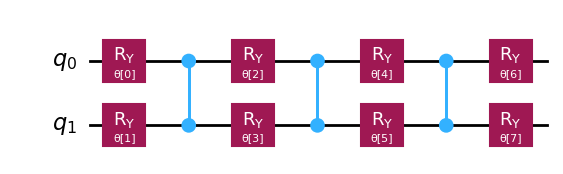

In [ ]:
ansatz.decompose().draw('mpl')
#All below gives the same graph:
#ansatz.decompose().draw("mpl")
#ansatz.decompose().draw(output='mpl')
#ansatz.decompose().draw(output="mpl")


In [15]:
#Creating ansatz for number of qubits=3

num_of_qubits = 3
ansatz = TwoLocal(num_of_qubits,"ry", "cz")

#drawing the ansatz circuit  by first decomposing it
ansatz.decompose().draw()

#Two circuits as in second one starts where first one ends

┌──────────┐      ┌──────────┐                  ┌──────────┐            »
q_0: ┤ Ry(θ[0]) ├─■──■─┤ Ry(θ[3]) ├─────────────■──■─┤ Ry(θ[6]) ├────────────»
     ├──────────┤ │  │ └──────────┘┌──────────┐ │  │ └──────────┘┌──────────┐»
q_1: ┤ Ry(θ[1]) ├─■──┼──────■──────┤ Ry(θ[4]) ├─■──┼──────■──────┤ Ry(θ[7]) ├»
     ├──────────┤    │      │      ├──────────┤    │      │      ├──────────┤»
q_2: ┤ Ry(θ[2]) ├────■──────■──────┤ Ry(θ[5]) ├────■──────■──────┤ Ry(θ[8]) ├»
     └──────────┘                  └──────────┘                  └──────────┘»
«           ┌──────────┐             
«q_0: ─■──■─┤ Ry(θ[9]) ├─────────────
«      │  │ └──────────┘┌───────────┐
«q_1: ─■──┼──────■──────┤ Ry(θ[10]) ├
«         │      │      ├───────────┤
«q_2: ────■──────■──────┤ Ry(θ[11]) ├
«                       └───────────┘

In [19]:
from qiskit_algorithms.optimizers import SLSQP   #SLSQP: a classical optimizer

#file location of qiskit algorithms: This PC -> Admin -> anaconda3 -> qiskit algorithms

optimizer = SLSQP(maxiter=100) #maxiter: the max no. of iterations. (Note: not the maximal no. of function evaluations)

Calling Estimator to evaluate expectation value. (Estimator is a primitive) <br>
Primitive uses: to sample circuits or evaluate expectation values <br>
Primitives can be based on a simlator or real hardware (can be used interchangably in the algorithm). For simulation, check Qiskit Aer. For real hardware, check Qiskit IBM runtime.

In [23]:
from qiskit.primitives import Estimator
estimator = Estimator()


In [ ]:
#estimator, ansatz and optimizer are required in VQE as input variables
from qiskit_algorithms import VQE
vqe = VQE(estimator,ansatz,optimizer)